In [9]:
import pandas as pd
import numpy as np

In [78]:
folder = r"C:/Users/SAHA/Documents/jupyter notebook/"
filename = "moving-away-fixed.csv"
data = pd.read_csv(folder+filename)
data.head()

,date_index,rsrp,rsrq,wbcqi,macStats_phr,dlCqiReport_sfnSn,macStats_totalBytesSdusDl,macStats_totalTbsUl,macStats_mcs1Ul,macStats_totalPduDl,...,pdcpStats_pktTxBytes,pdcpStats_pktRxAiat,pdcpStats_pktRxBytes,pdcpStats_pktTx,pdcpStats_pktTxW,pdcpStats_pktTxAiatW,pdcpStats_sfn,pdcpStats_pktTxAiat,rnti,quality
0,4424,-127,-13,3,4294967295,6800,7747,575460,10,966,...,12872,614301,40372,35,0,0,639127,609518,32812,0
1,4423,-127,-13,3,4294967295,6720,7747,575460,10,966,...,12872,614301,40372,35,0,0,639077,609518,32812,0
2,4422,-127,-13,3,4294967295,6640,7747,575460,10,966,...,12872,614301,40372,35,0,0,639027,609518,32812,0
3,4421,-127,-13,3,4294967295,6560,7747,575460,10,966,...,12872,614301,40372,35,0,0,638977,609518,32812,0
4,4420,-127,-13,3,4294967295,6480,7747,575460,10,966,...,12872,614301,40372,35,0,0,638927,609518,32812,0


In [67]:
#drop columns with only 'zero' as value
data1 = data.loc[:, (data != 0).any(axis=0)]
#drop columns with constant values
data1 = data1.loc[:,data1.apply(pd.Series.nunique) != 1]
#data1=data.drop(['macStats_prbUl','pdcpStats_pktRxOo','rnti','quality'], axis=1)
data1.head()
#pdcpStats_pktRx, pdcpStats_pktTx, 

,date_index,rsrp,rsrq,wbcqi,macStats_phr,dlCqiReport_sfnSn,macStats_totalBytesSdusDl,macStats_totalTbsUl,macStats_mcs1Ul,macStats_totalPduDl,...,pdcpStats_pktTxBytesW,pdcpStats_pktTxSn,pdcpStats_pktTxBytes,pdcpStats_pktRxAiat,pdcpStats_pktRxBytes,pdcpStats_pktTx,pdcpStats_pktTxW,pdcpStats_pktTxAiatW,pdcpStats_sfn,pdcpStats_pktTxAiat
0,4424,-127,-13,3,4294967295,6800,7747,575460,10,966,...,0,14,12872,614301,40372,35,0,0,639127,609518
1,4423,-127,-13,3,4294967295,6720,7747,575460,10,966,...,0,14,12872,614301,40372,35,0,0,639077,609518
2,4422,-127,-13,3,4294967295,6640,7747,575460,10,966,...,0,14,12872,614301,40372,35,0,0,639027,609518
3,4421,-127,-13,3,4294967295,6560,7747,575460,10,966,...,0,14,12872,614301,40372,35,0,0,638977,609518
4,4420,-127,-13,3,4294967295,6480,7747,575460,10,966,...,0,14,12872,614301,40372,35,0,0,638927,609518


In [79]:
data2=data1[['date_index', 'rsrp','rsrq','wbcqi','macStats_mcs1Ul','macStats_mcs1Dl','macStats_mcs2Dl']]
data2.head()

,date_index,rsrp,rsrq,wbcqi,macStats_mcs1Ul,macStats_mcs1Dl,macStats_mcs2Dl
0,4424,-127,-13,3,10,2,0
1,4423,-127,-13,3,10,2,0
2,4422,-127,-13,3,10,2,0
3,4421,-127,-13,3,10,2,0
4,4420,-127,-13,3,10,2,0


In [59]:
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
%matplotlib inline
init_notebook_mode(connected=True)

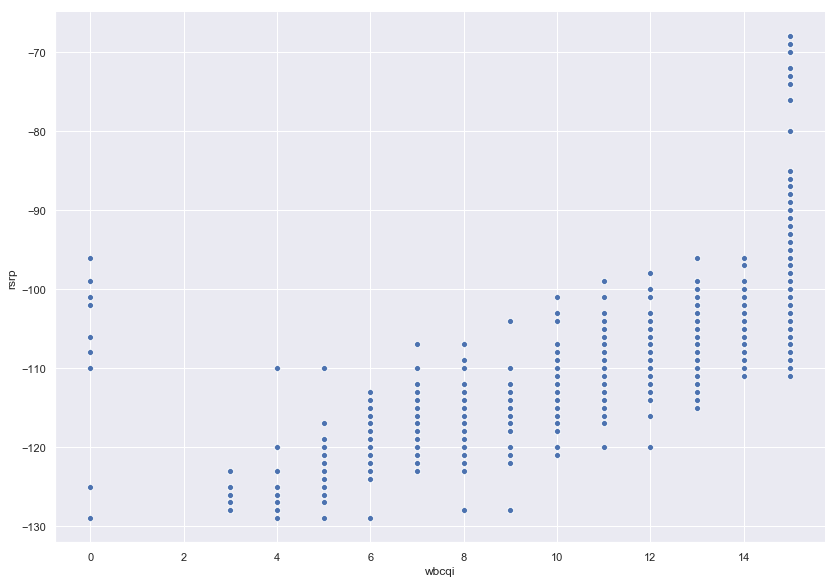

In [45]:
sns.pairplot(x_vars=['wbcqi'], y_vars=['rsrp'], data=data1,height=8.27, aspect=11.7/8.27)
#sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=data1)
plt.show()

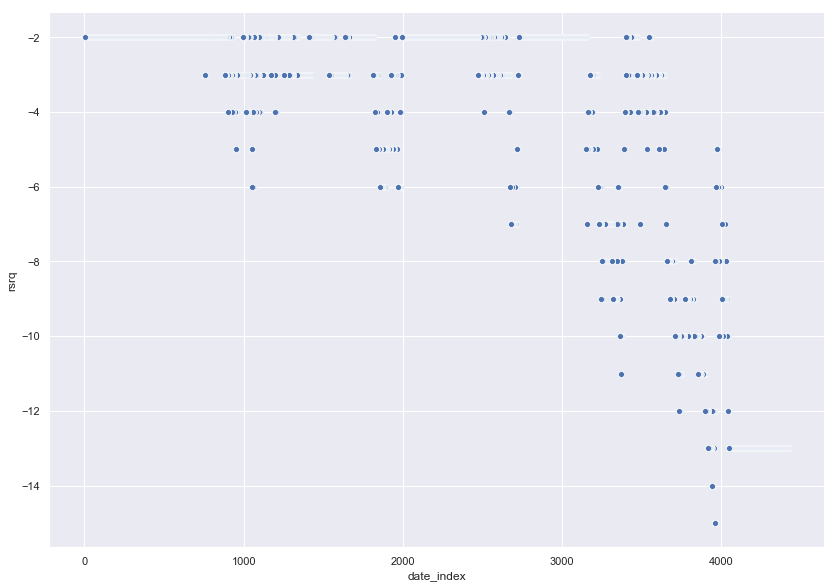

In [76]:
sns.pairplot(x_vars=['date_index'], y_vars=['rsrq'], data=data1,height=8.27, aspect=11.7/8.27)
plt.show()

[Text(0, 0.5, 'rsrq (db)'), Text(0.5, 0, 'timestamps')]

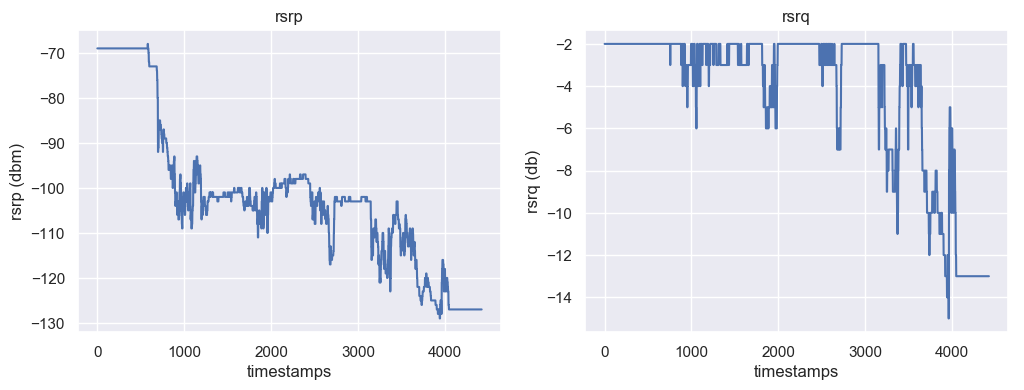

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4), dpi=100)
axes[0].plot(data1['date_index'], data1['rsrp'])
axes[0].set_title("rsrp")
axes[0].set(xlabel='timestamps', ylabel='rsrp (dbm)')
axes[1].plot(data1['date_index'], data1['rsrq'])
axes[1].set_title("rsrq")
axes[1].set(xlabel='timestamps', ylabel='rsrq (db)')


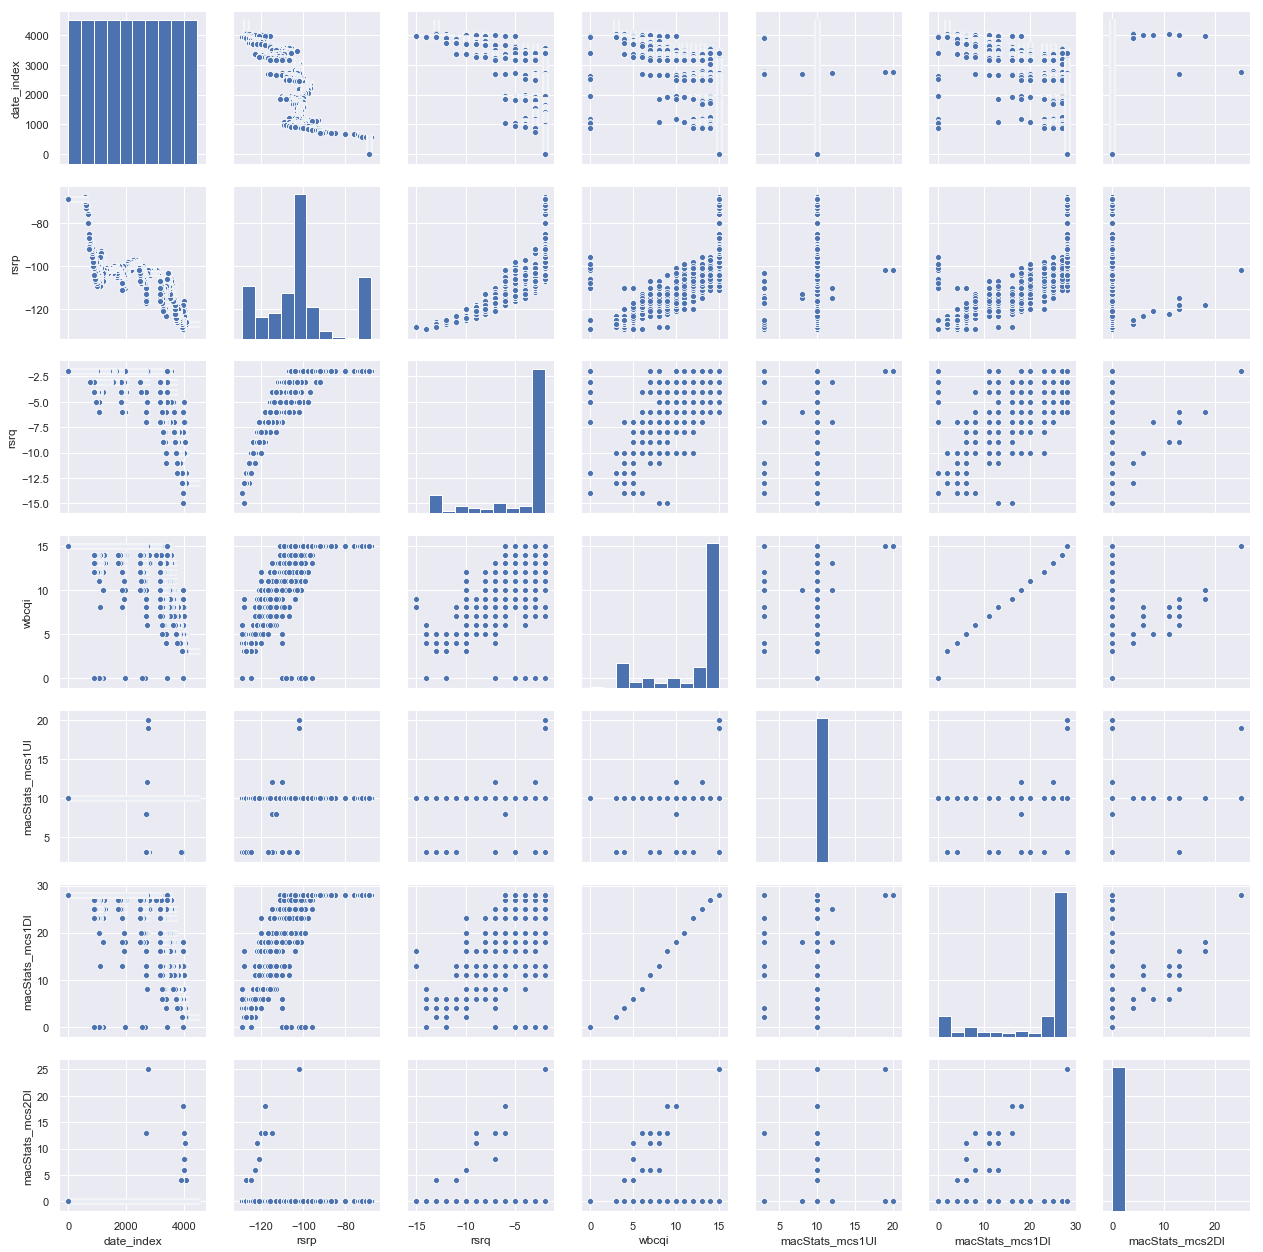

In [80]:
sns.pairplot(data2)

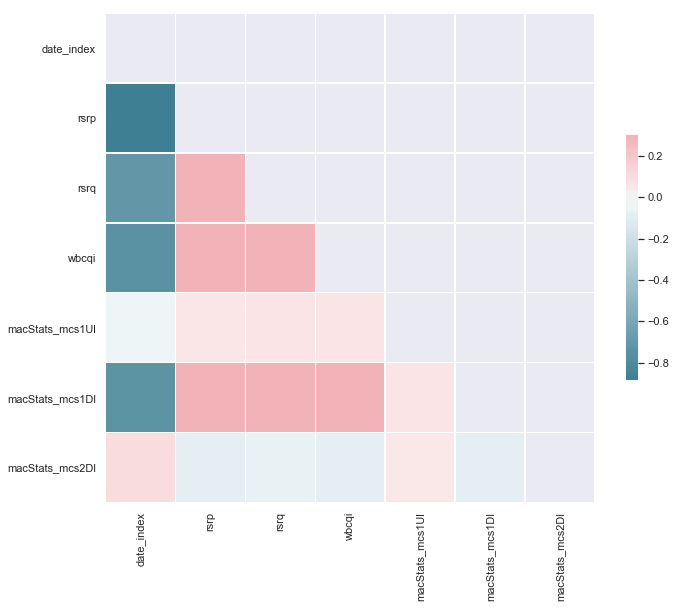

In [81]:
# Compute the correlation matrix
corr = data2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [82]:
data1.to_csv('4gV5gRAN.data_exp.1.csv')
data2.to_csv('4gV5gRAN.data_exp.2.csv')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4), dpi=100)
#try to do distribution for some of the columns
axes[0].plot(data1['date_index'], data1['rsrp'])
axes[0].set_title("rsrp")

axes[1].plot(data1['date_index'], data1['rsrq'])
axes[1].set_title("rsrq")